# Business Requirement
Spark Funds wants to make investments in a few companies and it has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

For analysis consider a country to be English speaking only if English is one of the official languages in that country

### Business objective: 
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Goal of the Data Analysis:

Investment type analysis
Country analysis
Sector analysis

## Checkpoint1: Data Loading
Load companies and rounds data into 2 dataframes and name them companies and rounds2 respectively

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
companies = pd.read_csv("./companies.csv", encoding = "unicode_escape")
rounds2 = pd.read_csv("./rounds2.csv", encoding = "unicode_escape")

In [3]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
# as part of data cleaning lower case change should be applied to company permalink to be in sync
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
# In the companies data frame, identify column that can be used as the  unique key for each company?
companies['permalink'].value_counts()

/organization/thinkgrid                                  1
/organization/africa-angels-network                      1
/organization/virnetx                                    1
/organization/beijing-zhongbaixin-software-technology    1
/organization/incline-therapeutics                       1
                                                        ..
/organization/silentium                                  1
/organization/sopogy                                     1
/organization/skyepack                                   1
/organization/cevec-pharmaceuticals                      1
/organization/runa                                       1
Name: permalink, Length: 66368, dtype: int64

In [7]:
companies['name'].str.lower().value_counts()

shift                       4
spire                       4
karma                       4
#name?                      4
kiwi                        4
                           ..
cloud your car              1
hometouch                   1
posse                       1
kalvista pharmaceuticals    1
where                       1
Name: name, Length: 66034, dtype: int64

#### since there are duplicates in name, but not in permalink, hence permalink can be considered as unique key for companies data set

In [8]:
# How many unique companies are present in the companies file and rounds file
print(companies['permalink'].nunique())
print(rounds2['company_permalink'].nunique())

66368
66370


In [9]:
# Are there any companies in the rounds2 file which are not  present in companies ? 
uniq_rounds2 = set(rounds2['company_permalink'].unique())
uniq_companies = set(companies['permalink'].unique())

# returns list of companies that are present in rounds2, but not in companies
uniq_rounds2 - uniq_companies

{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame

In [10]:
master_frame = pd.merge(rounds2, companies, 
                  left_on='company_permalink',
                  right_on='permalink',
                  how='left')
master_frame.shape

(114949, 16)

#### Data cleaning
- drop unnecessary columns
- drop unrequired rows

In [11]:
# express missing values per column as % of total number of values to check for column level density
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [12]:
## removing columns that add no value to the conclusion to be derived and has high missing values
master_frame = master_frame.drop(['funding_round_code', 'founded_at', 'state_code', 'city', 'region', 'homepage_url'], axis = 1)

In [13]:
master_frame.isnull().sum(axis = 0)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
category_list               2.97
status                      0.01
country_code                7.55
dtype: float64

#### there are many records where raised_amount_usd /  country code /  category list is null and such records add no value to the data and so such data can be removed.

In [14]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        88529 non-null  object 
 1   funding_round_permalink  88529 non-null  object 
 2   funding_round_type       88529 non-null  object 
 3   funded_at                88529 non-null  object 
 4   raised_amount_usd        88529 non-null  float64
 5   permalink                88529 non-null  object 
 6   name                     88528 non-null  object 
 7   category_list            88529 non-null  object 
 8   status                   88529 non-null  object 
 9   country_code             88529 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


## Checkpoint2 : Funding type analysis
Spark Funds wants to choose one of these four investment types for each potential investment they will make.

In [15]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [16]:
# Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, 
# and private equity) 
master_frame1 = master_frame[master_frame['funding_round_type'].isin (['venture','angel', 'seed', 'private_equity'])]

In [17]:
# convert raised amount to million
master_frame1['raised_amount_usd'] = master_frame1['raised_amount_usd']/1000000
master_frame1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.043360,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN


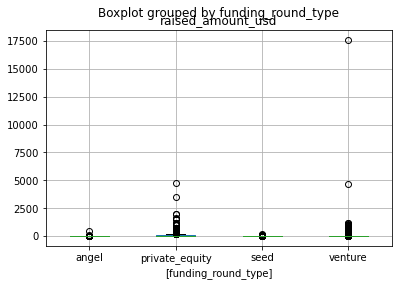

In [18]:
master_frame1.boxplot(column=['raised_amount_usd'], by=['funding_round_type'])
plt.show()

In [19]:
master_frame1['raised_amount_usd'].describe()

count    75124.000000
mean         9.519475
std         77.927782
min          0.000000
25%          0.470585
50%          2.000000
75%          8.000000
max      17600.000000
Name: raised_amount_usd, dtype: float64

In [20]:
# since the raised amount value is skewed across funding_round_type, hence median would be a better measure
rn = pd.DataFrame(round(master_frame1.groupby('funding_round_type')['raised_amount_usd'].median(), 2))
rn

,raised_amount_usd
funding_round_type,
angel,0.41
private_equity,20.00
seed,0.30
venture,5.00


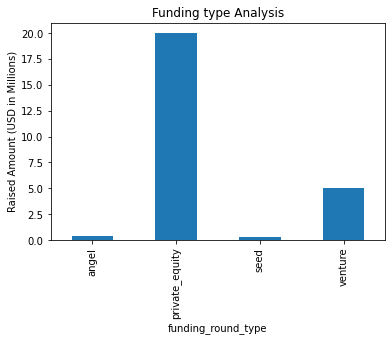

In [21]:
# plot bar graph
rn.raised_amount_usd.plot(kind='bar' , x=rn.index, y='raised_amount_usd', ylabel = 'Raised Amount (USD in Millions)', title='Funding type Analysis')
plt.show()

### Since Spark funds wants to invest between 5 - 15M USD per round of investment, venture investment type seems more suitable for Spark

In [22]:
# get top 9 countries which have received the highest total funding across ALL sectors for the chosen investment type
mf_venture = master_frame1[(master_frame['funding_round_type']== 'venture')]
t9= pd.DataFrame(round(mf_venture.groupby('country_code')['raised_amount_usd'].sum(), 2).sort_values(ascending=False).head(9))
t9

,raised_amount_usd
country_code,
USA,420068.03
CHN,39338.92
GBR,20072.81
IND,14261.51
CAN,9482.22
FRA,7226.85
ISR,6854.35
DEU,6306.92
JPN,3167.65


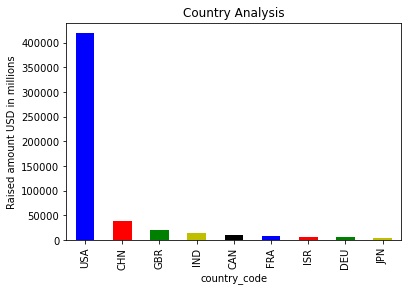

In [23]:
# plot bar graph
t9.raised_amount_usd.plot(kind='bar' , x='country_code', y='raised_amount_usd', ylabel = 'Raised amount USD in millions',
                          title = 'Country Analysis', color = ['b', 'r', 'g', 'y', 'k'])
plt.show()

In [24]:
t9.index

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

In [25]:
# For the chosen investment type, make a data frame named top9 with the top nine countries 
# (based on the total investment amount each country has received)
top9 = mf_venture[mf_venture['country_code'].isin(t9.index)]
top9.shape

(44118, 10)

#### Identify top 3 english speaking countries
Since China is not listed amongst English speaking country, hence top 3 english speaking countries are USA, Great Britain and India

## Checkpoint 4: Sector Analysis 1

#### category_list needs to be cleaned up to pick the primary sector
(as mentioned by CEO they came up with the business rule that the first string before the vertical bar will be considered the primary sector.

In [26]:
top9['category_list'] = top9['category_list'].apply(lambda x: x.split('|')[0])
top9.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000,/organization/0xdata,H2O.ai,Analytics,operating,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,/organization/0xdata,H2O.ai,Analytics,operating,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.000000,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.520000,/organization/1000memories,1000memories,Curated Web,acquired,USA
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.265940,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA


#### read mapping table and categorize into main sector

In [27]:
mapping = pd.read_csv("mapping.csv")
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [28]:
# data analysis shows that across category_list 'na' has been replaced by 0 & 2.0 has been replaced by 2.na 
# This needs to be fixed before mapping
mapping['category_list'] = mapping['category_list'].replace({'0':'na'}, regex=True)

# above replace function will replace 2.0 as 2.na
mapping['category_list'] = mapping['category_list'].replace({'2.na':'2.0'}, regex=True)

# remove case sensitivity from column category_list
mapping['category_list'] = mapping['category_list'].str.lower()

In [29]:
main_sector=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
main_sector=main_sector[main_sector.value==1]
main_sector['main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: main_sector, dtype: int64

In [30]:
# blank category list does not add any value so this record can be deleted
#main_sector = m[m.main_sector != 'Blanks']
main_sector.shape

(688, 3)

In [31]:
# to remove case sensitivity from joining columns convert to lower case
top9['category_list'] = top9['category_list'].str.lower()

In [32]:
top9 = pd.merge(top9, main_sector, 
                  left_on='category_list',
                  right_on='category_list',
                  how='left')
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44118 entries, 0 to 44117
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        44118 non-null  object 
 1   funding_round_permalink  44118 non-null  object 
 2   funding_round_type       44118 non-null  object 
 3   funded_at                44118 non-null  object 
 4   raised_amount_usd        44118 non-null  float64
 5   permalink                44118 non-null  object 
 6   name                     44118 non-null  object 
 7   category_list            44118 non-null  object 
 8   status                   44118 non-null  object 
 9   country_code             44118 non-null  object 
 10  main_sector              44107 non-null  object 
 11  value                    44107 non-null  float64
dtypes: float64(2), object(10)
memory usage: 4.4+ MB


In [33]:
# identify records where main sector is still valid
top9[top9['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector,value
8353,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,0.125000,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,natural gas uses,operating,USA,NaN,NaN
11536,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,0.250000,/organization/dolores-speech-products,Dolores Speech Products,adaptive equipment,operating,USA,NaN,NaN
14069,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68.569234,/organization/fia-formula-e,FIA Formula E,racing,closed,GBR,NaN,NaN
14348,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194.000000,/organization/five-below,Five Below,specialty retail,ipo,USA,NaN,NaN
16996,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9.486929,/organization/healthtell,HealthTell,biotechnology and semiconductor,operating,USA,NaN,NaN
20305,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,0.862000,/organization/justinmind,Justinmind,rapidly expanding,operating,USA,NaN,NaN
27190,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3.172815,/organization/omega-point-research,Omega Point Research,product search,closed,USA,NaN,NaN
33956,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2.499999,/organization/sense-labs-inc-,Sense,greentech,operating,USA,NaN,NaN
34256,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1.100000,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,retirement,closed,USA,NaN,NaN
34257,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2.000000,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,retirement,closed,USA,NaN,NaN


In [34]:
# since there is no valid sector mapping, such records can be removed
top9 = top9[~top9['main_sector'].isnull()]
top9.shape

(44107, 12)

## Checkpoint 5: Sector Analysis 2

#### three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD

In [35]:
D1 = top9[(top9['country_code'] == 'USA') & (top9['raised_amount_usd'] >= 5) & (top9['raised_amount_usd']<= 15)]
D2 = top9[(top9['country_code'] == 'GBR') & (top9['raised_amount_usd'] >= 5) & (top9['raised_amount_usd']<= 15)]
D3 = top9[(top9['country_code'] == 'IND') & (top9['raised_amount_usd'] >= 5) & (top9['raised_amount_usd']<= 15)]

In [36]:
#Total amount of investment (USD), Total number of investment
print("USA: ", round(D1.raised_amount_usd.sum(), 2), "->", round(D1.raised_amount_usd.count(), 2))
print("GBR: ", round(D2.raised_amount_usd.sum(), 2), "->", round(D2.raised_amount_usd.count(), 2))
print("IND: ",round(D3.raised_amount_usd.sum(), 2), "->", round(D3.raised_amount_usd.count(), 2))

USA:  107757.1 -> 12063
GBR:  5379.08 -> 621
IND:  2949.54 -> 328


In [37]:
# sector wise count
D1_sector = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D1_sector.sort_values(('raised_amount_usd', 'Total_count'), ascending = False)

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714
Cleantech / Semiconductors                   21633.430822        2350
News, Search and Messaging                   13971.567428        1583
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
Entertainment                                 5099.197982         591
Automotive & Sports                           1454.104361         167

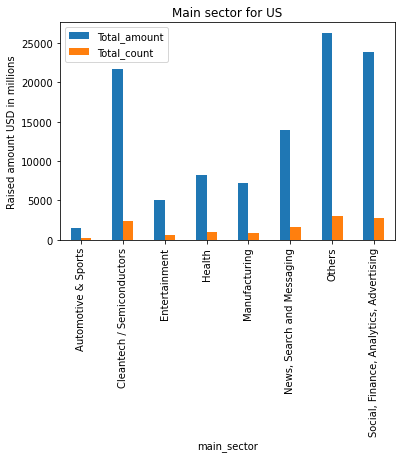

In [38]:
D1_sector.raised_amount_usd.plot(kind='bar', ylabel = 'Raised amount USD in millions', title = 'Main sector for US')
plt.show()

In [39]:
D2_sector = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D2_sector.sort_values(('raised_amount_usd', 'Total_count'), ascending = False)

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133
Cleantech / Semiconductors                    1163.990056         130
News, Search and Messaging                     615.746235          73
Entertainment                                  482.784687          56
Manufacturing                                  361.940335          42
Health                                         214.537510          24
Automotive & Sports                            167.051565          16

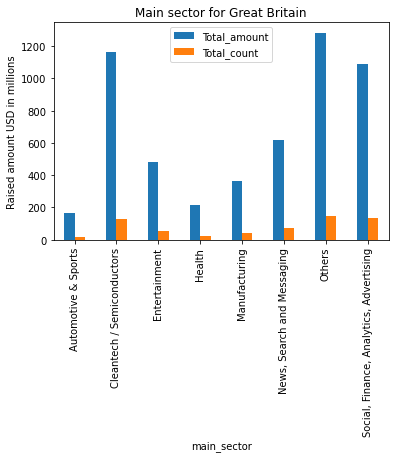

In [40]:
D2_sector.raised_amount_usd.plot(kind='bar', ylabel = 'Raised amount USD in millions', title = 'Main sector for Great Britain')
plt.show()

In [41]:
D3_sector = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
D3_sector.sort_values(('raised_amount_usd', 'Total_count'), ascending = False)

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60
News, Search and Messaging                     433.834545          52
Entertainment                                  280.830000          33
Manufacturing                                  200.900000          21
Cleantech / Semiconductors                     165.380000          20
Health                                         167.740000          19
Automotive & Sports                            136.900000          13

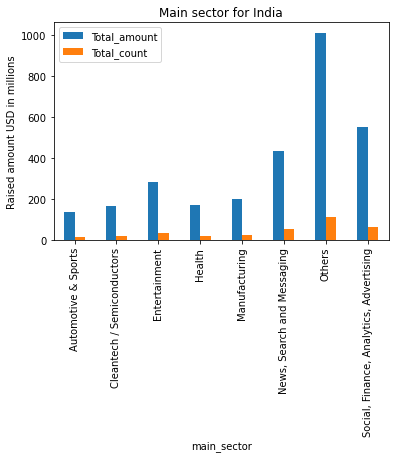

In [42]:
D3_sector.raised_amount_usd.plot(kind='bar', ylabel = 'Raised amount USD in millions', title = 'Main sector for India')
plt.show()

In [43]:
# US - For the top sector count-wise (point 3), which company received the highest investment 
D1[D1['main_sector'] == 'Others'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  name       
Others       Virtustream    64.3
Name: raised_amount_usd, dtype: float64

In [44]:
# US - For the second-best sector count-wise (point 4), which company received the highest investment?
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              name                           
Social, Finance, Analytics, Advertising  SST Inc. (Formerly ShotSpotter)    67.933006
Name: raised_amount_usd, dtype: float64

In [45]:
# for GBR, which company received the highest investment?
D2[D2['main_sector'] == 'Others'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  name          
Others       Electric Cloud    37.0
Name: raised_amount_usd, dtype: float64

In [46]:
#GBR - For the second-best sector count-wise  which company received the highest investment?
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              name                 
Social, Finance, Analytics, Advertising  Celltick Technologies    37.5
Name: raised_amount_usd, dtype: float64

In [47]:
# for IND , which company received the highest investment?
D3[D3['main_sector'] == 'Others'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector  name        
Others       FirstCry.com    39.0
Name: raised_amount_usd, dtype: float64

In [48]:
#For IND - the second-best sector count-wise (point 4), which company received the highest investment?
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1)

main_sector                              name           
Social, Finance, Analytics, Advertising  Manthan Systems    50.7
Name: raised_amount_usd, dtype: float64

In [49]:
#For the third-best sector count-wise, which company received the highest investment 
# US
print(D1[D1['main_sector'] == 'Cleantech / Semiconductors'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1))
# GB
print(D2[D2['main_sector'] == 'Cleantech / Semiconductors'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1))
# IND
print(D3[D3['main_sector'] == 'News, Search and Messaging'].groupby(['main_sector', 'name']).raised_amount_usd.sum().sort_values(ascending=False).head(1))

main_sector                 name    
Cleantech / Semiconductors  Biodesix    75.3
Name: raised_amount_usd, dtype: float64
main_sector                 name       
Cleantech / Semiconductors  EUSA Pharma    35.6
Name: raised_amount_usd, dtype: float64
main_sector                 name   
News, Search and Messaging  GupShup    33.0
Name: raised_amount_usd, dtype: float64
